In [1]:
import pandas as pd
df = pd.read_csv('CICEVSE2024.csv')

C:\Users\MALIKA\AppData\Local\Temp\ipykernel_16152\99778511.py:2: DtypeWarning: Columns (81,82,83,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('CICEVSE2024.csv')


In [2]:
print("Descriptive Statistics:")
print(df.describe())

# Data types and missing values
print("\nData Types and Missing Values:")
print(df.info())
print("\nMissing Values Count:")
print(df.isnull().sum())

Descriptive Statistics:
                 id  expiration_id      src_port      dst_port      protocol  \
count  2.744700e+06   2.744700e+06  2.744700e+06  2.744700e+06  2.744700e+06   
mean   5.374561e+04   2.477502e-05  4.320332e+04  5.828036e+03  6.134726e+00   
std    4.915507e+04   4.977390e-03  1.565881e+04  1.197252e+04  1.365722e+00   
min    0.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00   
25%    1.763075e+04   0.000000e+00  3.560700e+04  8.000000e+01  6.000000e+00   
50%    4.017200e+04   0.000000e+00  4.551900e+04  1.091000e+03  6.000000e+00   
75%    6.734400e+04   0.000000e+00  5.516000e+04  5.903000e+03  6.000000e+00   
max    2.280000e+05   1.000000e+00  6.553500e+04  6.553500e+04  2.460000e+02   

         ip_version    vlan_id     tunnel_id  bidirectional_first_seen_ms  \
count  2.744700e+06  2744700.0  2.744700e+06                 2.744700e+06   
mean   4.000039e+00        0.0  1.093016e-06                 1.703149e+12   
std    8.788533e-03     

In [3]:
# Print columns with missing values
missing_columns = df.columns[df.isnull().sum() > 0]
print("Columns with missing values:", missing_columns.tolist())

Columns with missing values: ['requested_server_name', 'client_fingerprint', 'server_fingerprint', 'user_agent', 'content_type']


In [4]:
df_ = df.copy()
df_.drop(columns = ['requested_server_name', 'client_fingerprint', 'server_fingerprint', 'user_agent', 'content_type'], inplace = True)
df_.head()

,id,expiration_id,src_ip,src_mac,src_oui,src_port,dst_ip,dst_mac,dst_oui,dst_port,...,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets,application_name,application_category_name,application_is_guessed,application_confidence,label_mul
0,0,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,256,...,0,1,0,1,0,Unknown,Unspecified,0,0,charging Aggressive scan
1,1,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,993,...,0,1,0,1,0,IMAPS,Email,1,1,charging Aggressive scan
2,2,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,139,...,0,1,0,1,0,NetBIOS,System,1,1,charging Aggressive scan
3,3,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,143,...,0,1,0,1,0,IMAP,Email,1,1,charging Aggressive scan
4,4,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,135,...,0,1,0,1,0,RPC,RPC,1,1,charging Aggressive scan


In [5]:
df_ = df_.dropna()
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2744700 entries, 0 to 2744699
Data columns (total 82 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   id                            int64  
 1   expiration_id                 int64  
 2   src_ip                        object 
 3   src_mac                       object 
 4   src_oui                       object 
 5   src_port                      int64  
 6   dst_ip                        object 
 7   dst_mac                       object 
 8   dst_oui                       object 
 9   dst_port                      int64  
 10  protocol                      int64  
 11  ip_version                    int64  
 12  vlan_id                       int64  
 13  tunnel_id                     int64  
 14  bidirectional_first_seen_ms   int64  
 15  bidirectional_last_seen_ms    int64  
 16  bidirectional_duration_ms     int64  
 17  bidirectional_packets         int64  
 18  bidirectional_bytes   

In [6]:
ev = df_.copy()
import numpy as np

ev['label_mul'] = ev['label_mul'].str.replace(r'\d+$', '', regex=True)
ev['label_bi'] = np.where(ev['label_mul'].isin(['idle benign', 'Charging Benign']), 0, 1)
ev['src_ip'] = ev['src_ip'].astype(str)+":"+ev['src_port'].astype(str)
ev['dst_ip'] = ev['dst_ip'].astype(str)+":"+ev['dst_port'].astype(str)
ev.drop(columns=['id', 'expiration_id', 'src_mac', 'src_oui', 'dst_mac', 'dst_oui', 'src_port','dst_port'], inplace=True)
# Original to new label mapping
label_mapping = {
    'charging Aggressive scan': 'aggressive-scan',
    'Charging Benign': 'None',
    'charging icmp flood': 'icmp-flood',
    'charging icmp fragmentation': 'icmp-fragmentation',
    'charging os fingerprinting': 'os-fingerpriting',
    'charging portscan': 'TCP-port-scan',
    'charging push ack flood': 'pshack-flood',
    'charging service detection': 'service-version-detection',
    'charging slowLoris scan': 'slowloris-scan',
    'charging syn flood': 'syn-flood',
    'charging syn stealth': 'syn-stealth-scan',
    'charging synonymous ip': 'synonymousIP-flood',
    'charging tcp flood': 'TCP-flood',
    'charging udp flood': 'upd-flood',
    'charging vulnerability scan': 'vulnerability-scan',
    'idle aggressive scan': 'aggressive-scan',
    'idle benign': 'None',
    'idle icmp fragmentation': 'icmp-fragmentation',
    'idle os fingerprinting': 'os-fingerpriting',
    'idle portscan': 'TCP-port-scan',
    'idle service detection': 'service-version-detection',
    'idle slowloris scan': 'slowloris-scan',
    'idle syn flood': 'syn-flood',
    'idle syn stealth scan': 'syn-stealth-scan',
    'idle synonymous ip': 'synonymousIP-flood',
    'idle tcp flood': 'TCP-flood',
    'idle udp flood': 'upd-flood',
    'idle vulnerability scan': 'vulnerability-scan',
    'charging aggressive scan': 'aggressive-scan',
    'charging port scan': 'TCP-port-scan',
    'charging service detection scan': 'service-version-detection',
    'charging synonymous ip flood': 'synonymousIP-flood',
    'idle icmp flood': 'icmp-flood',
    'idle port scan': 'TCP-port-scan',
    'idle push ack flood': 'pshack-flood',
    'idle synonymous ip flood': 'synonymousIP-flood',
    'MaliciousEV aggressive scan': 'aggressive-scan',
    'MaliciousEV os fingerprinting': 'os-fingerpriting',
    'MaliciousEV port scan': 'TCP-port-scan',
    'MaliciousEV service detection': 'service-version-detection',
    'MaliciousEV syn stealth scan': 'syn-stealth-scan',
    'MaliciousEV vulnerability scan': 'vulnerability-scan'
}

# Apply the mapping to the label_mul column
ev['label_mul'] = ev['label_mul'].map(label_mapping)

# Verify the mapping
print(ev['label_mul'].unique())
ev['vlan_id'].unique(), ev['dst2src_cwr_packets'].unique(), ev['dst2src_urg_packets'].unique()
ev.info()

['aggressive-scan' 'None' 'icmp-flood' 'icmp-fragmentation'
 'os-fingerpriting' 'TCP-port-scan' 'pshack-flood'
 'service-version-detection' 'slowloris-scan' 'syn-flood'
 'syn-stealth-scan' 'synonymousIP-flood' 'TCP-flood' 'upd-flood'
 'vulnerability-scan']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2744700 entries, 0 to 2744699
Data columns (total 75 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   src_ip                        object 
 1   dst_ip                        object 
 2   protocol                      int64  
 3   ip_version                    int64  
 4   vlan_id                       int64  
 5   tunnel_id                     int64  
 6   bidirectional_first_seen_ms   int64  
 7   bidirectional_last_seen_ms    int64  
 8   bidirectional_duration_ms     int64  
 9   bidirectional_packets         int64  
 10  bidirectional_bytes           int64  
 11  src2dst_first_seen_ms         int64  
 12  src2dst_last_seen_ms   

In [7]:
from sklearn.preprocessing import LabelEncoder

# List of object columns to encode
object_columns = [
    "application_name",
    "application_category_name",
]

# Apply label encoding to each column
label_encoders = {}  # To store the encoders for each column
for col in object_columns:
    label_encoders[col] = LabelEncoder()  # Create a LabelEncoder for each column
    ev[col] = label_encoders[col].fit_transform(ev[col].astype(str))  # Encode the column

# Verify the result
print(ev[object_columns].head())
# Define a mapping dictionary for the 'Attack' column
attack_mapping = {
    'aggressive-scan': 'Recon',
    'None': 'Benign',
    'icmp-flood': 'DoS',
    'icmp-fragmentation': 'DoS',
    'os-fingerpriting': 'Recon',
    'TCP-port-scan': 'Recon',
    'pshack-flood': 'DoS',
    'service-version-detection': 'Recon',
    'slowloris-scan': 'DoS',
    'syn-flood': 'DoS',
    'syn-stealth-scan': 'Recon',
    'synonymousIP-flood': 'DoS',
    'TCP-flood': 'DoS',
    'upd-flood': 'DoS',
    'vulnerability-scan': 'Recon'
}

# Map the 'Attack' column to the new categories
ev['Scenario'] = ev['label_mul'].map(attack_mapping)

# Verify the mapping
print(ev[['label_mul', 'Scenario']].head())


   application_name  application_category_name
0                61                         14
1                23                          5
2                35                         13
3                22                          5
4                42                         11
         label_mul Scenario
0  aggressive-scan    Recon
1  aggressive-scan    Recon
2  aggressive-scan    Recon
3  aggressive-scan    Recon
4  aggressive-scan    Recon


In [8]:
ev.drop(columns = ['label_mul'], inplace=True)
ev['Scenario'].replace({"Benign":0, "Recon":1, "DoS":2, "Cryptojacking":3, "Backdoor":4
}, inplace= True)
ev['Scenario'].unique()

array([1, 0, 2], dtype=int64)

In [9]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

# Step 1: Create a Mapping for Each Unique IP
all_ips = list(set(ev['src_ip']) | set(ev['dst_ip']))
ip_map = {ip: i for i, ip in enumerate(all_ips)}

# Step 2: Convert Source and Destination IPs to Indices
a = [ip_map[ip] for ip in ev['src_ip']]
b = [ip_map[ip] for ip in ev['dst_ip']]
edge_index = torch.tensor([a, b], dtype=torch.long)

# Step 3: Use Learnable Embeddings for IP Addresses as Node Features
num_nodes = len(all_ips)
embedding_dim = 16  # Can be tuned
node_features = torch.nn.Embedding(num_nodes, embedding_dim)

# Step 4: Edge Features (PCA-Reduced)
edge_features = ev.iloc[:, 2:73].to_numpy()  # Edge Features
scaler = StandardScaler()
edge_features_standardized = scaler.fit_transform(edge_features)
edge_attr = torch.tensor(edge_features_standardized, dtype=torch.float)

# Step 5: Labels
labels = torch.tensor(ev['label_bi'].values, dtype=torch.long)

In [10]:

# Create PyG Data Object
data = Data(x=node_features.weight, edge_index=edge_index, edge_attr=edge_attr, y=labels)

# Split Dataset
num_edges = edge_index.shape[1]
indices = torch.randperm(num_edges)
split = int(0.7 * num_edges)
train_idx = indices[:split]
test_idx = indices[split:]

train_edge_index = edge_index[:, train_idx]
test_edge_index = edge_index[:, test_idx]

train_edge_attr = edge_attr[train_idx]
test_edge_attr = edge_attr[test_idx]

train_labels = labels[train_idx]
test_labels = labels[test_idx]

train_data = Data(x=node_features.weight, edge_index=train_edge_index, edge_attr=train_edge_attr, y=train_labels)
test_data = Data(x=node_features.weight, edge_index=test_edge_index, edge_attr=test_edge_attr, y=test_labels)

# DataLoader
train_loader = DataLoader([train_data], batch_size=32, shuffle=True)
test_loader = DataLoader([test_data], batch_size=32)


In [11]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, SAGEConv, GATConv, GINConv, MessagePassing
from torch_geometric.data import Data

class EdgeGNN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, gnn_type="SAGE"):
        super(EdgeGNN, self).__init__()

        # 🔹 Choose GNN Type
        if gnn_type == "GCN":
            self.conv1 = GCNConv(in_channels, hidden_channels)
            self.conv2 = GCNConv(hidden_channels, hidden_channels)
        elif gnn_type == "GAT":
            self.conv1 = GATConv(in_channels, hidden_channels, heads=2, concat=False)
            self.conv2 = GATConv(hidden_channels, hidden_channels, heads=2, concat=False)
        elif gnn_type == "GIN":
            self.conv1 = GINConv(torch.nn.Sequential(
                torch.nn.Linear(in_channels, hidden_channels),
                torch.nn.ReLU(),
                torch.nn.Linear(hidden_channels, hidden_channels)
            ))
            self.conv2 = GINConv(torch.nn.Sequential(
                torch.nn.Linear(hidden_channels, hidden_channels),
                torch.nn.ReLU(),
                torch.nn.Linear(hidden_channels, hidden_channels)
            ))
        elif gnn_type == "MPNN":
            class MPNNLayer(MessagePassing):
                def __init__(self, in_channels, out_channels):
                    super().__init__(aggr='mean')  # Aggregation function
                    self.linear = torch.nn.Linear(in_channels, out_channels)

                def forward(self, x, edge_index):
                    return self.linear(self.propagate(edge_index, x=x))

                def message(self, x_j):
                    return x_j

            self.conv1 = MPNNLayer(in_channels, hidden_channels)
            self.conv2 = MPNNLayer(hidden_channels, hidden_channels)
        elif gnn_type == "SAGE":  # Explicitly add GraphSAGE
            self.conv1 = SAGEConv(in_channels, hidden_channels)
            self.conv2 = SAGEConv(hidden_channels, hidden_channels)
        else:
            raise ValueError("Invalid GNN type. Choose from ['GCN', 'GAT', 'GIN', 'MPNN', 'Graphormer', 'SAGE']")

        # Edge MLP Classifier
        self.edge_mlp = torch.nn.Linear(hidden_channels * 2 + edge_attr.shape[1], out_channels)

    def forward(self, x, edge_index, edge_attr):
        x = self.conv1(x, edge_index)
        x = self.conv2(x, edge_index)
        x = F.relu(x)

        # Compute Edge Embeddings
        src, dst = edge_index
        edge_embeddings = torch.cat([x[src], x[dst], edge_attr], dim=1)

        # Predict Edge Labels
        edge_logits = self.edge_mlp(edge_embeddings)
        return edge_logits



# Model, Optimizer, Loss
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
gnn_type = "SAGE"

# Create Model
model = EdgeGNN(
    in_channels=embedding_dim,
    hidden_channels=32,
    out_channels=len(labels.unique()),
    gnn_type=gnn_type
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
class_counts = torch.bincount(labels)  # Count occurrences of each class
class_weights = 1.0 / class_counts.float()  # Inverse of frequency
class_weights = class_weights / class_weights.sum()  # Normalize
class_weights = class_weights.to(device)  # Move to GPU if needed
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

In [12]:
# Model, Optimizer, Loss
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
gnn_type = "GCN"

# Create Model
model = EdgeGNN(
    in_channels=embedding_dim,
    hidden_channels=32,
    out_channels=len(labels.unique()),
    gnn_type=gnn_type
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

class_counts = torch.bincount(labels)  # Count occurrences of each class
class_weights = 1.0 / class_counts.float()  # Inverse of frequency
class_weights = class_weights / class_weights.sum()  # Normalize
class_weights = class_weights.to(device)  # Move to GPU if needed
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

In [13]:

# Train the Model
epochs = 50
loss_list, acc_list = [], []

for epoch in range(epochs):
    model.train()
    total_loss, correct, total = 0, 0, 0

    train_loader_tqdm = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}", leave=False)
    for batch in train_loader_tqdm:
        batch = batch.to(device)
        optimizer.zero_grad()
        outputs = model(batch.x, batch.edge_index, batch.edge_attr)
        loss = criterion(outputs, batch.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        # Compute Accuracy
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == batch.y).sum().item()
        total += batch.y.size(0)
        train_loader_tqdm.set_postfix(loss=loss.item())

    avg_loss = total_loss / len(train_loader)
    train_accuracy = correct / total
    loss_list.append(avg_loss)
    acc_list.append(train_accuracy)
    print(f"Epoch {epoch+1}/{epochs}, Avg Loss: {avg_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")


Epoch 1/50, Avg Loss: 0.3898, Train Accuracy: 0.7618


Epoch 2/50, Avg Loss: 0.3102, Train Accuracy: 0.9101


Epoch 3/50, Avg Loss: 0.2574, Train Accuracy: 0.9486


Epoch 4/50, Avg Loss: 0.2168, Train Accuracy: 0.9830


Epoch 5/50, Avg Loss: 0.1854, Train Accuracy: 0.9909


Epoch 6/50, Avg Loss: 0.1612, Train Accuracy: 0.9949


Epoch 7/50, Avg Loss: 0.1420, Train Accuracy: 0.9968


Epoch 8/50, Avg Loss: 0.1263, Train Accuracy: 0.9975


Epoch 9/50, Avg Loss: 0.1132, Train Accuracy: 0.9978


Epoch 10/50, Avg Loss: 0.1020, Train Accuracy: 0.9980


Epoch 11/50, Avg Loss: 0.0923, Train Accuracy: 0.9981


Epoch 12/50, Avg Loss: 0.0839, Train Accuracy: 0.9982


Epoch 13/50, Avg Loss: 0.0765, Train Accuracy: 0.9983


Epoch 14/50, Avg Loss: 0.0699, Train Accuracy: 0.9983


Epoch 15/50, Avg Loss: 0.0642, Train Accuracy: 0.9983


Epoch 16/50, Avg Loss: 0.0590, Train Accuracy: 0.9984


Epoch 17/50, Avg Loss: 0.0545, Train Accuracy: 0.9984


Epoch 18/50, Avg Loss: 0.0504, Train Accuracy: 0.9984


Epoch 19/50, Avg Loss: 0.0467, Train Accuracy: 0.9985


Epoch 20/50, Avg Loss: 0.0435, Train Accuracy: 0.9985


Epoch 21/50, Avg Loss: 0.0405, Train Accuracy: 0.9985


Epoch 22/50, Avg Loss: 0.0379, Train Accuracy: 0.9985


Epoch 23/50, Avg Loss: 0.0355, Train Accuracy: 0.9986


Epoch 24/50, Avg Loss: 0.0334, Train Accuracy: 0.9986


Epoch 25/50, Avg Loss: 0.0315, Train Accuracy: 0.9987


Epoch 26/50, Avg Loss: 0.0297, Train Accuracy: 0.9987


Epoch 27/50, Avg Loss: 0.0281, Train Accuracy: 0.9987


Epoch 28/50, Avg Loss: 0.0267, Train Accuracy: 0.9988


Epoch 29/50, Avg Loss: 0.0254, Train Accuracy: 0.9988


Epoch 30/50, Avg Loss: 0.0242, Train Accuracy: 0.9988


Epoch 31/50, Avg Loss: 0.0231, Train Accuracy: 0.9988


Epoch 32/50, Avg Loss: 0.0221, Train Accuracy: 0.9988


Epoch 33/50, Avg Loss: 0.0212, Train Accuracy: 0.9988


Epoch 34/50, Avg Loss: 0.0203, Train Accuracy: 0.9988


Epoch 35/50, Avg Loss: 0.0195, Train Accuracy: 0.9988


Epoch 36/50, Avg Loss: 0.0188, Train Accuracy: 0.9988


Epoch 37/50, Avg Loss: 0.0181, Train Accuracy: 0.9988


Epoch 38/50, Avg Loss: 0.0175, Train Accuracy: 0.9988


Epoch 39/50, Avg Loss: 0.0169, Train Accuracy: 0.9988


Epoch 40/50, Avg Loss: 0.0164, Train Accuracy: 0.9988


Epoch 41/50, Avg Loss: 0.0158, Train Accuracy: 0.9988


Epoch 42/50, Avg Loss: 0.0154, Train Accuracy: 0.9988


Epoch 43/50, Avg Loss: 0.0149, Train Accuracy: 0.9988


Epoch 44/50, Avg Loss: 0.0145, Train Accuracy: 0.9989


Epoch 45/50, Avg Loss: 0.0140, Train Accuracy: 0.9989


Epoch 46/50, Avg Loss: 0.0137, Train Accuracy: 0.9989


Epoch 47/50, Avg Loss: 0.0133, Train Accuracy: 0.9989


Epoch 48/50, Avg Loss: 0.0129, Train Accuracy: 0.9989


Epoch 49/50, Avg Loss: 0.0126, Train Accuracy: 0.9989


Epoch 50/50, Avg Loss: 0.0123, Train Accuracy: 0.9989


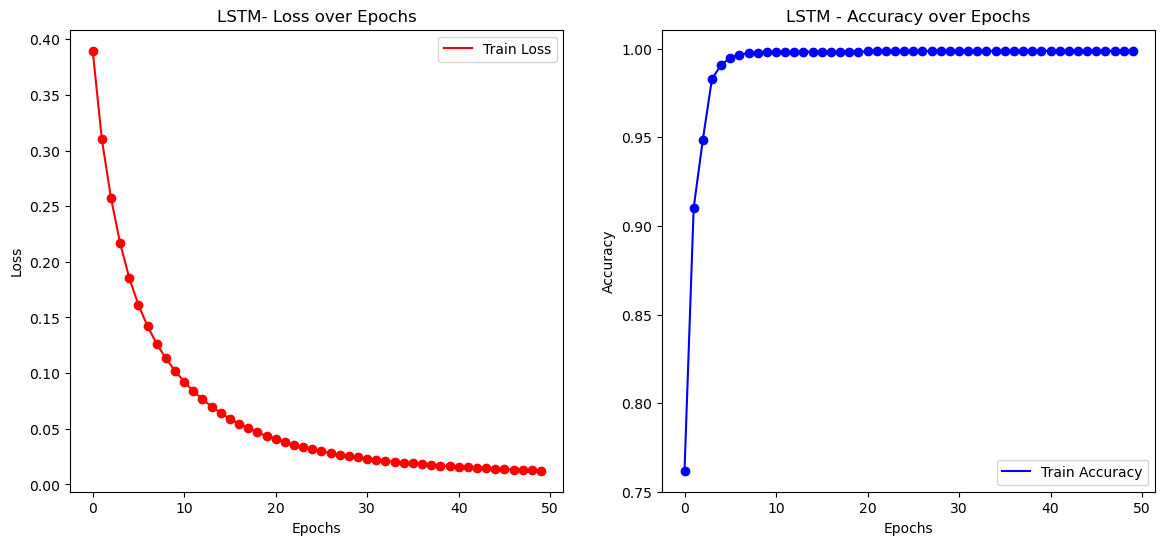

In [26]:
import matplotlib.pyplot as plt
# Plot loss and accuracy for both training and validation
plt.figure(figsize=(14, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(range(epochs), loss_list, label="Train Loss", color="red")
plt.scatter(range(epochs),loss_list, marker='o', c='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LSTM- Loss over Epochs")
#plt.grid(True)
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(range(epochs), acc_list, label="Train Accuracy", color="blue")
plt.scatter(range(epochs), acc_list, marker='o', color="blue")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("LSTM - Accuracy over Epochs")
#plt.grid(True)
plt.legend()

#plt.tight_layout()
#plt.savefig('GNN1.png', dpi=600, bbox_inches='tight')
plt.show()


In [14]:
sage_loss_list = loss_list.copy()
sage_acc_list = acc_list.copy()

In [15]:
from sklearn.metrics import classification_report

model.eval()
correct, total = 0, 0
all_predictions = []
all_targets = []

with torch.no_grad():
    for batch in test_loader:
        batch = batch.to(device)
        outputs = model(batch.x, batch.edge_index, batch.edge_attr)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == batch.y).sum().item()
        total += batch.y.size(0)

        # Store for classification report
        all_predictions.extend(predicted.cpu().numpy())
        all_targets.extend(batch.y.cpu().numpy())
target_names = ["Benign", "Attack"]
test_accuracy = correct / total
print(f"Test Accuracy: {test_accuracy:.4f}")

# Print Classification Report
print("\nClassification Report:")
print(classification_report(all_targets, all_predictions,  target_names= target_names, digits=4))

Test Accuracy: 0.9987

Classification Report:
              precision    recall  f1-score   support

      Benign     0.0199    1.0000    0.0391        21
      Attack     1.0000    0.9987    0.9994    823390

    accuracy                         0.9987    823411
   macro avg     0.5100    0.9994    0.5192    823411
weighted avg     1.0000    0.9987    0.9993    823411



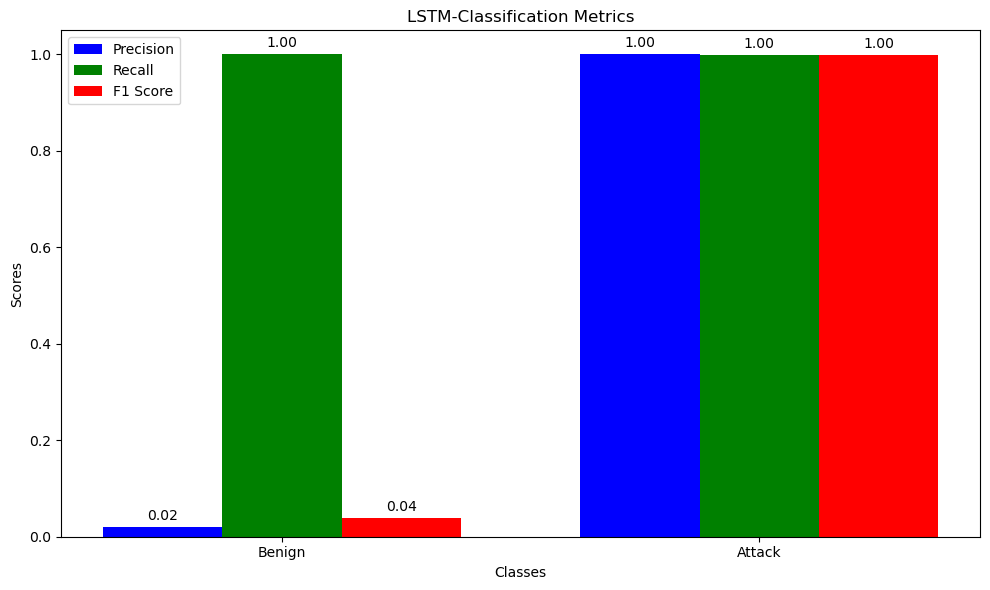

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Assuming all_targets and all_predictions are defined
target_names = ["Benign", "Attack"]
report = classification_report(all_targets, all_predictions, target_names=target_names, output_dict=True)

# Extracting metrics
labels = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
precision = [report[label]['precision'] for label in labels]
recall = [report[label]['recall'] for label in labels]
f1_score = [report[label]['f1-score'] for label in labels]

# Setting up the bar chart
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, precision, width, label='Precision', color='blue')
bars2 = ax.bar(x, recall, width, label='Recall', color='green')
bars3 = ax.bar(x + width, f1_score, width, label='F1 Score', color='red')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('LSTM-Classification Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Adding value labels on top of the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points", 
                    ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)

plt.tight_layout()
plt.show()

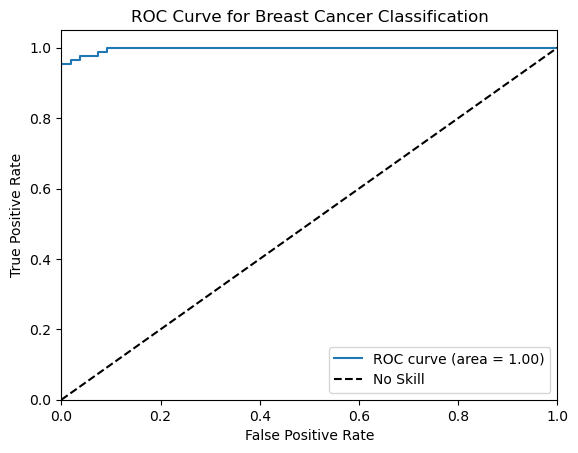

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Load dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Breast Cancer Classification')
plt.legend()
plt.show()



In [18]:
l1=[]
l2=[]
for i in range(50):
  l1.append(loss_list[i])
  l2.append(acc_list[i])

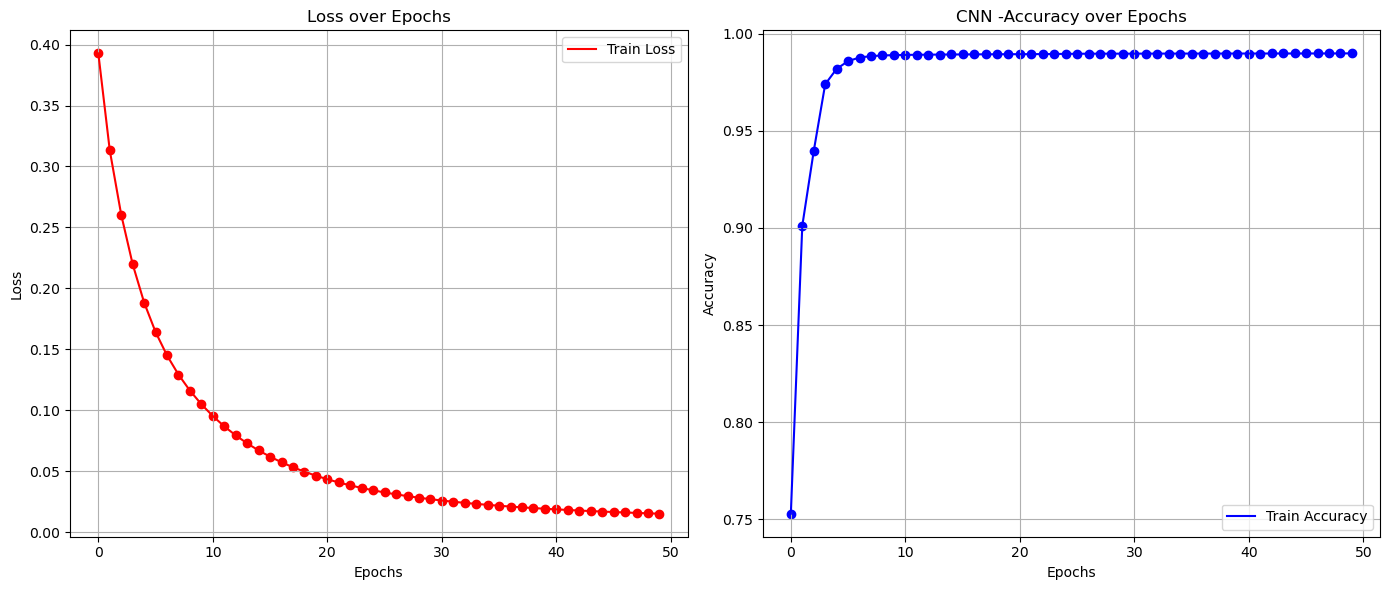

In [19]:
import matplotlib.pyplot as plt
# Plot loss and accuracy for both training and validation
plt.figure(figsize=(14, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(range(epochs), l1, label="Train Loss", color="red")
plt.scatter(range(epochs),l1, marker='o', c='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.grid(True)
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(range(epochs), l2, label="Train Accuracy", color="blue")
plt.scatter(range(epochs),l2, marker='o', c='blue')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("CNN -Accuracy over Epochs")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [20]:
print(l1)

[0.39277211713790894, 0.3131525604724884, 0.26036644864082337, 0.21980241823196411, 0.18840726602077484, 0.16423223304748535, 0.14502503859996796, 0.12933426487445832, 0.11621394145488739, 0.10502880948781967, 0.09534961867332459, 0.08690402793884278, 0.07948611813783646, 0.0729492022395134, 0.06716325271129608, 0.062026338160038, 0.0574523298740387, 0.05337128552794457, 0.04972544822096825, 0.04646171393990517, 0.04353301736712456, 0.04090095075964928, 0.03853145378828049, 0.03639536860585213, 0.03446611899137497, 0.03272056902945042, 0.03113812345266342, 0.029701187714934348, 0.028393610820174216, 0.027200044572353362, 0.02610764230787754, 0.02510518904030323, 0.02418309959769249, 0.0233325804322958, 0.022545840099453925, 0.021815858289599418, 0.021136795610189437, 0.0205038855522871, 0.019912952065467834, 0.01936025309562683, 0.018841105952858924, 0.01835239815711975, 0.017891370199620723, 0.017456018805503844, 0.017044920913875102, 0.016655712828040122, 0.016287213630974292, 0.0159

In [21]:
print(l2)

[0.7528125123289625, 0.9011134706959755, 0.9396022144508193, 0.9740077619764648, 0.9819274450642251, 0.9859263229009274, 0.9877750817289851, 0.9884923085491043, 0.9888384303454608, 0.9890034237431224, 0.9891231350411104, 0.9891923594003817, 0.9892506535976628, 0.9892954152134322, 0.9893396563452973, 0.9893693239278422, 0.9894010734460043, 0.9894302205446448, 0.9894572857076681, 0.98948174845117, 0.9894989244200117, 0.9895181823244708, 0.9895535752299628, 0.9896045826525838, 0.9896509057200661, 0.98970711798173, 0.9897425108872221, 0.9897560434687337, 0.9897612483077767, 0.9897690555663411, 0.9897737399214798, 0.9897867520190872, 0.9897966412132688, 0.9898013255684075, 0.989807571375259, 0.9898148581499191, 0.9898221449245793, 0.9898257883119094, 0.9898273497636222, 0.9898315136348566, 0.9898351570221866, 0.9898398413773253, 0.989848169119794, 0.989853373958837, 0.9898575378300714, 0.9898596197656886, 0.9898632631530186, 0.9898710704115831, 0.9898882463804248, 0.989922077834204]


In [22]:
l11=[0.5173197131156921, 0.5031581561565399, 0.4907775263786316, 0.47962856698036194, 0.46938816118240356, 0.45983592081069946, 0.4510011713504791, 0.44258863139152527, 0.43446207451820373, 0.4264920394420624, 0.41866672444343567, 0.4109609763622284, 0.40330717372894287, 0.39567035841941833, 0.3880301456451416, 0.38038728046417236, 0.3727318834066391, 0.36505732345581055, 0.3573601584434509, 0.3496237586736679, 0.34184557604789734, 0.3340585421323776, 0.3262729536294937, 0.3185016702413559, 0.3107598613500595, 0.3030587922334671, 0.2953792999982834, 0.287778009057045, 0.2802495549917221, 0.27279638159275055, 0.26547065782546997, 0.2582974474430084, 0.251296822309494, 0.2444866265654564, 0.2378860827088356, 0.23149913954734802, 0.22534538465738296, 0.2194331030845642, 0.21377142924070358, 0.20835818010568619, 0.2032088975906372, 0.19832473653554916, 0.19370699334144592, 0.1893529336452484, 0.1852558295726776, 0.18140962752699852, 0.17780829626321792, 0.17444308134913444, 0.17130387234687805, 0.16838699612021446]

In [23]:
l22=[0.5958454157599403, 0.6452289285994975, 0.6661768442956786, 0.6791582333527126, 0.693765614126766, 0.7128736192212624, 0.7338251783047735, 0.7489072403995443, 0.7570991365692512, 0.7678851245179669, 0.7852984340200772, 0.8090757002200085, 0.8146423900829079, 0.8374931949331933, 0.8559152022418283, 0.8895612492446477, 0.9006631709232708, 0.9118416037358252, 0.9232745531775802, 0.9341661993588679, 0.9446659211602211, 0.9545296116305251, 0.9634798528487906, 0.9709009123562359, 0.9763290389941336, 0.9799922047125653, 0.9824582574511175, 0.9840608273924433, 0.9848915197036989, 0.9852621042435573, 0.9855202642600879, 0.985721171047146, 0.9858767957345302, 0.986036584293149, 0.986147447364764, 0.9862296838216427, 0.9862754864052207, 0.9863171251175643, 0.9863426288288748, 0.986330657699076, 0.9862931828579667, 0.9862463393065801, 0.9862208355952696, 0.9862026186586192, 0.9862078234976622, 0.9862192741435567, 0.9862354091445898, 0.9862593514041875, 0.9862963057613925, 0.9863244118922244]

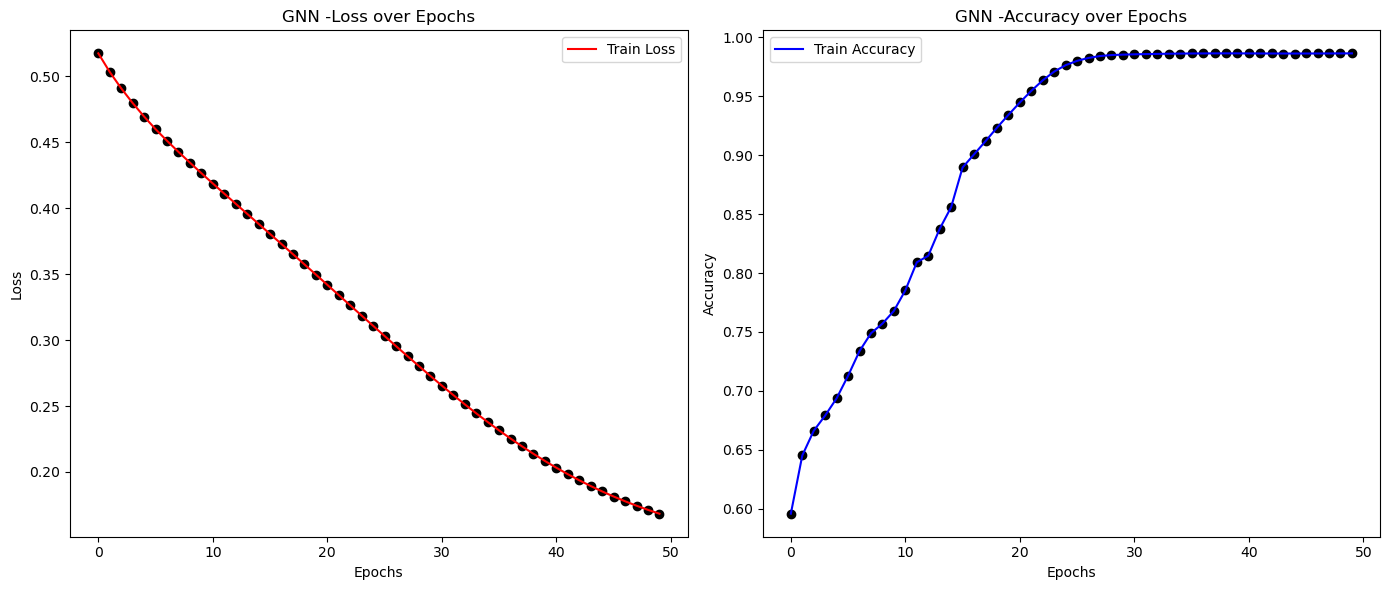

In [24]:
import matplotlib.pyplot as plt
# Plot loss and accuracy for both training and validation
plt.figure(figsize=(14, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(range(epochs), l11, label="Train Loss", color="red")
plt.scatter(range(epochs),l11, marker='o', c='black')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("GNN -Loss over Epochs")

plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(range(epochs), l22, label="Train Accuracy", color="blue")
plt.scatter(range(epochs),l22, marker='o', c='black')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("GNN -Accuracy over Epochs")

plt.legend()

plt.tight_layout()
plt.show()

C:\Users\MALIKA\AppData\Local\Temp\ipykernel_16152\2702824064.py:16: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 1,0.1)


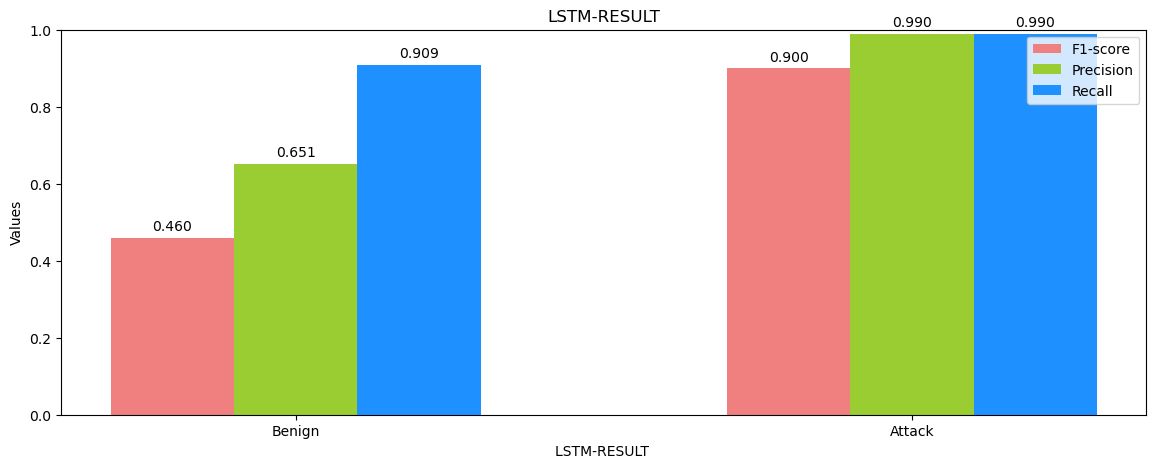

In [28]:
import matplotlib.pyplot as plt
import numpy as np

t = np.array([1, 2])

f1_score = [0.4597, 0.8999]
precision = [0.6515, .9900]
recall = [0.9091, 0.990]

plt.figure(figsize=(14, 5))

f1_score_bar = plt.bar(t, f1_score, width=0.2, label='F1-score', color='lightcoral')
precision_bar = plt.bar(t+0.2, precision, width=0.2, label='Precision', color='yellowgreen')
recall_bar = plt.bar(t+0.4, recall, width=0.2, label='Recall', color='dodgerblue')

plt.ylim(0, 1,0.1)

plt.xlabel('LSTM-RESULT ')
plt.ylabel('Values')
plt.title('LSTM-RESULT')
plt.xticks(t + 0.2, ['Benign', 'Attack'])
plt.legend(loc='upper right')

for bar in f1_score_bar:
    height = bar.get_height()
    plt.annotate('%.3f' % height, 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), 
                 textcoords='offset points', 
                 ha='center', va='bottom')

for bar in precision_bar:
    height = bar.get_height()
    plt.annotate('%.3f' % height, 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), 
                 textcoords='offset points', 
                 ha='center', va='bottom')

for bar in recall_bar:
    height = bar.get_height()
    plt.annotate('%.3f' % height, 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), 
                 textcoords='offset points', 
                 ha='center', va='bottom')
#plt.savefig('cl.pdf')
plt.show()